### **Implementation of a Three Hidden Layer Neural Network for Multi-Class Classification**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Generate data
X, y = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=15,
    n_redundant=2,
    n_classes=5,
    random_state=42
)

# One-hot encoding
def to_one_hot(y, n_classes):
    return np.eye(n_classes)[y]

y_one_hot = to_one_hot(y, 5)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [6]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Init weights and biases (He initialization)
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2. / self.input_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.hidden_size) * np.sqrt(2. / self.hidden_size)
        self.b2 = np.zeros((1, self.hidden_size))
        self.W3 = np.random.randn(self.hidden_size, self.hidden_size) * np.sqrt(2. / self.hidden_size)
        self.b3 = np.zeros((1, self.hidden_size))
        self.W4 = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2. / self.hidden_size)
        self.b4 = np.zeros((1, self.output_size))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return Z > 0

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.relu(self.Z2)
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.relu(self.Z3)
        self.Z4 = np.dot(self.A3, self.W4) + self.b4
        self.A4 = self.softmax(self.Z4)
        return self.A4

    def backward(self, X, y, output):
        m = X.shape[0]

        # Gradients
        dZ4 = output - y
        dW4 = (1/m) * np.dot(self.A3.T, dZ4)
        db4 = (1/m) * np.sum(dZ4, axis=0, keepdims=True)

        dA3 = np.dot(dZ4, self.W4.T)
        dZ3 = dA3 * self.relu_derivative(self.Z3)
        dW3 = (1/m) * np.dot(self.A2.T, dZ3)
        db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)

        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * self.relu_derivative(self.Z2)
        dW2 = (1/m) * np.dot(self.A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        # Updates
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3
        self.W4 -= self.learning_rate * dW4
        self.b4 -= self.learning_rate * db4

    def train(self, X, y, epochs=1000):
        loss_history = []
        for i in range(epochs):
            output = self.forward(X)
            loss = -np.mean(np.sum(y * np.log(output + 1e-8), axis=1))
            loss_history.append(loss)
            self.backward(X, y, output)

            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")
        return loss_history

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

In [7]:
# Initialize and Train
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = 5
model = NeuralNetwork(input_dim, hidden_dim, output_dim, learning_rate=0.1)

print("Starting Training...")
loss_curve = model.train(X_train, y_train, epochs=2000)

# Inference
y_pred_idx = model.predict(X_test)
y_true_idx = np.argmax(y_test, axis=1)

# Metrics
print("\n--- Evaluation Metrics ---")
print(f"Accuracy:  {accuracy_score(y_true_idx, y_pred_idx):.4f}")
print(f"Precision: {precision_score(y_true_idx, y_pred_idx, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_true_idx, y_pred_idx, average='weighted'):.4f}")
print(f"F1 Score:  {f1_score(y_true_idx, y_pred_idx, average='weighted'):.4f}")

Starting Training...
Epoch 0, Loss: 5.1592
Epoch 100, Loss: 0.4674
Epoch 200, Loss: 0.2253
Epoch 300, Loss: 0.1148
Epoch 400, Loss: 0.0636
Epoch 500, Loss: 0.0386
Epoch 600, Loss: 0.0257
Epoch 700, Loss: 0.0185
Epoch 800, Loss: 0.0140
Epoch 900, Loss: 0.0111
Epoch 1000, Loss: 0.0090
Epoch 1100, Loss: 0.0076
Epoch 1200, Loss: 0.0065
Epoch 1300, Loss: 0.0056
Epoch 1400, Loss: 0.0049
Epoch 1500, Loss: 0.0044
Epoch 1600, Loss: 0.0039
Epoch 1700, Loss: 0.0036
Epoch 1800, Loss: 0.0032
Epoch 1900, Loss: 0.0030

--- Evaluation Metrics ---
Accuracy:  0.7950
Precision: 0.7996
Recall:    0.7950
F1 Score:  0.7955


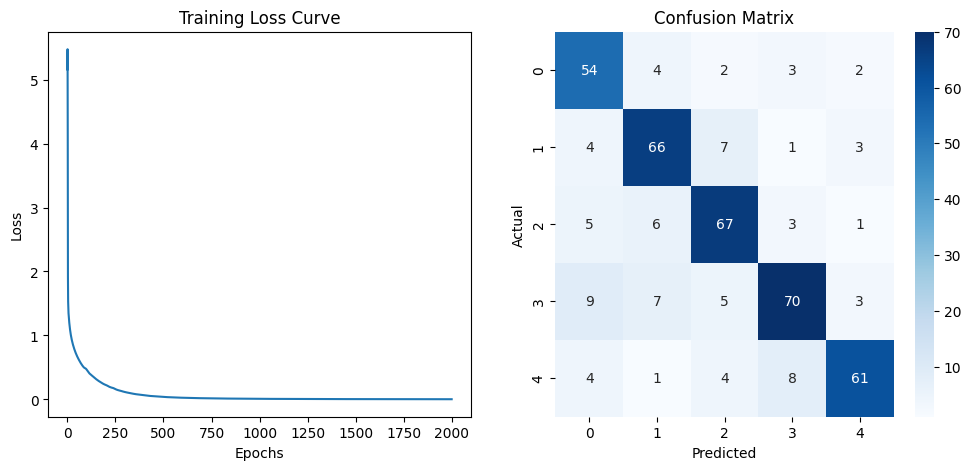

In [8]:
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(loss_curve)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_true_idx, y_pred_idx)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()